In [1]:
#Import libraries
import random
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Setting the variables for my initial data
mean = .5
std = mean/6
datapoints = 20000

In [4]:
#Function to get a list with a gaussian distribution
def get_gaussian_dist(mean,std,datapoints):
    gauss_lst = []
    while len(gauss_lst) < datapoints:
        sample = random.gauss(mean, std)
        if sample >= 0 and sample <= 1:
            gauss_lst.append(sample)
    return gauss_lst    

#Function to calculate the multiplier for water based on 3 regions
def get_waterfall(datapoints):
    pop = [-.02,0,.02]
    wei = [3,3,3]    
    lst = []
    for points in range(datapoints):
        multi = random.choices(pop,wei,k=1)
        lst.append(multi[0])
    return(lst)

In [27]:
def make_dataframe(mean,std,datapoints,plant,base_add,base_multi,length_multi):
    gauss_1 = get_gaussian_dist(mean,std,datapoints)
    gauss_2 = get_gaussian_dist(mean,std,datapoints)
    water_1 = get_waterfall(datapoints)
    dict = {'Base_gauss_1':gauss_1,'Sun_gauss_1':gauss_2,'Water_multi_1':water_1}
    df=pd.DataFrame(dict)
    df['var_1_w'] = (((df['Base_gauss_1'] * base_multi) + base_add) + df['Sun_gauss_1']) * (df['Water_multi_1'] + 1)
    df['var_1_l'] = df['var_1_w'] * (length_multi)
    #df['rand'] = (df['var_1_l']/df['var_1_w']) - length_multi
    df['plant_type'] = plant
    return(df)

In [48]:
plant_1 = make_dataframe(mean,std,datapoints,'plant_1',9.9,1,8.8)
plant_2 = make_dataframe(mean,std,datapoints,'plant_2',10.1,1,8.5)
plant_3 = make_dataframe(mean,std,datapoints,'plant_3',9.8,1.4,8.2)

In [49]:
fake_iris = pd.concat([plant_1,plant_2,plant_3])

In [50]:
fake_iris.sample(10)

,Base_gauss_1,Sun_gauss_1,Water_multi_1,var_1_w,var_1_l,plant_type
7787,0.438270,0.538159,-0.02,10.854901,92.266655,plant_2
17914,0.517159,0.469477,0.00,10.993500,90.146698,plant_3
8674,0.503294,0.519803,-0.02,10.803927,88.592198,plant_3
19608,0.418009,0.598071,0.02,11.202950,91.864188,plant_3
5750,0.585674,0.567456,0.02,11.411147,93.571409,plant_3
19280,0.469815,0.548665,0.00,11.006406,90.252529,plant_3
16491,0.443897,0.538228,-0.02,10.664483,93.847446,plant_1
15373,0.411835,0.617405,0.02,11.213854,91.953599,plant_3
2285,0.425876,0.436787,0.02,11.181917,95.046291,plant_2
2511,0.363517,0.592544,0.00,11.056061,93.976516,plant_2


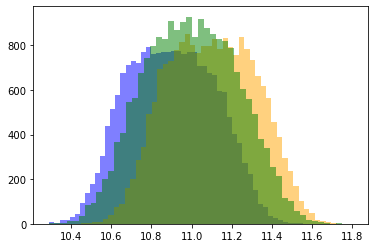

In [51]:
plt.hist(plant_1['var_1_w'], bins = 50, color='blue',alpha=.5);
plt.hist(plant_2['var_1_w'], bins = 50, color='orange',alpha=.5);
plt.hist(plant_3['var_1_w'], bins = 50, color='green',alpha=.5);

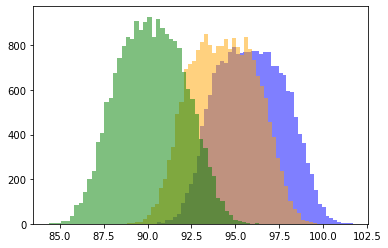

In [52]:
plt.hist(plant_1['var_1_l'], bins = 50, color='blue',alpha=.5);
plt.hist(plant_2['var_1_l'], bins = 50, color='orange',alpha=.5);
plt.hist(plant_3['var_1_l'], bins = 50, color='green',alpha=.5);